In [2]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 1.3 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     -------------------------------------- 55.4/55.4 kB 579.1 kB/s eta 0:00:00
  Using cached Pillow-9.3.0-cp39-cp39-win_amd64.whl (2.5 MB)
     ------------------------------------ 965.4/965.4 kB 736.4 kB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 1.4 MB/s eta 0:00:00


In [9]:
!pip install seaborn

     -------------------------------------- 288.2/288.2 kB 2.2 MB/s eta 0:00:00


In [21]:
!pip install scikit-learn
!pip install imblearn

     ---------------------------------------- 8.3/8.3 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 40.2/40.2 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 225.4/225.4 kB 4.6 MB/s eta 0:00:00


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
pd.set_option('display.max_columns', None)

In [5]:
credit_card_data = pd.read_csv('./Dataset/creditcard.csv')

In [6]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

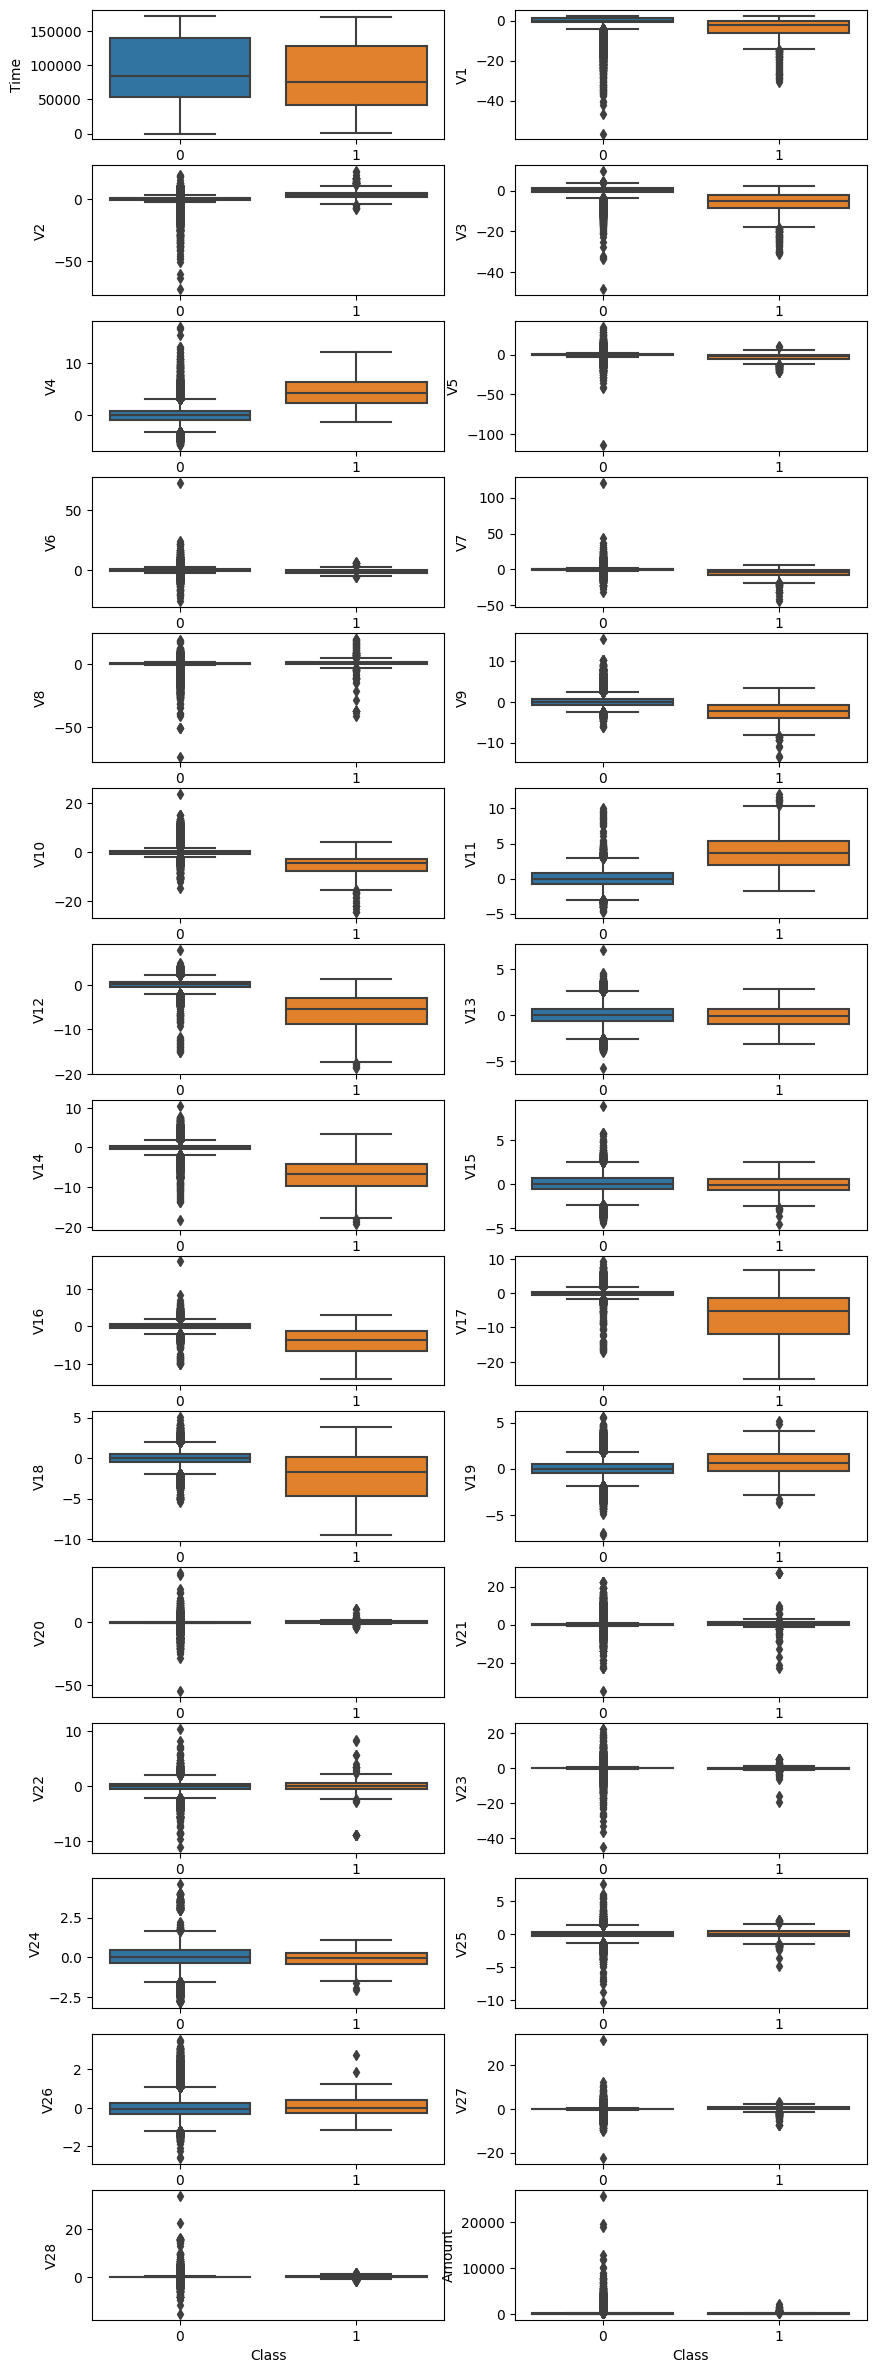

In [19]:
plt.figure(figsize=(10,30))
for y in enumerate(credit_card_data.columns):
    if y[1] == 'Class':
        continue
    else:
        plt.subplot(15, 2, y[0]+1)
        sns.boxplot(data=credit_card_data, x='Class', y=y[1])

### Model Development

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
X = credit_card_data[[x for x in credit_card_data.columns if x != 'Class']]
y = credit_card_data.Class

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=0)

In [40]:
lr = LogisticRegression(n_jobs=-1, verbose=10)

In [41]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.9s finished


LogisticRegression(n_jobs=-1, verbose=10)

In [42]:
lr.score(X_train, y_train)

0.9990124865588448

In [43]:
lr.score(X_test, y_test)

0.9988413328183702

In [45]:
clr_report = classification_report(y_test, lr.predict(X_test), output_dict=True)
pd.DataFrame(clr_report).T

,precision,recall,f1-score,support
0,0.999262,0.999578,0.999420,56864.000000
1,0.700000,0.571429,0.629213,98.000000
accuracy,0.998841,0.998841,0.998841,0.998841
macro avg,0.849631,0.785503,0.814317,56962.000000
weighted avg,0.998747,0.998841,0.998783,56962.000000


### SMOTE to improve f1-score for minority class label

In [57]:
from imblearn.over_sampling import SMOTE, SMOTEN
from imblearn.combine import SMOTEENN

In [48]:
## oversampling using smote

oversampler = SMOTE(n_jobs=-1)
X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)

C:\Users\manth\anaconda3\envs\fraud_detection\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [49]:
X_train_res.shape

(454902, 30)

In [50]:
y_train_res.shape

(454902,)

In [51]:
lr_smote = LogisticRegression(n_jobs=-1, verbose=10)

In [52]:
lr_smote.fit(X_train_res, y_train_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished


LogisticRegression(n_jobs=-1, verbose=10)

In [53]:
lr_smote.score(X_train_res, y_train_res)

0.9590241414634361

In [54]:
lr_smote.score(X_test, y_test)

0.9688564306028581

In [56]:
clr_report_smote = classification_report(y_test, lr_smote.predict(X_test), output_dict=True)
pd.DataFrame(clr_report_smote).T

,precision,recall,f1-score,support
0,0.999673,0.969119,0.984159,56864.000000
1,0.043573,0.816327,0.082730,98.000000
accuracy,0.968856,0.968856,0.968856,0.968856
macro avg,0.521623,0.892723,0.533445,56962.000000
weighted avg,0.998029,0.968856,0.982608,56962.000000


In [58]:
## using smote-enn 

oversampler_smotenn = SMOTEENN(n_jobs=-1)
X_train_res_smotenn, y_train_res_smotenn = oversampler_smotenn.fit_resample(X_train, y_train)

C:\Users\manth\anaconda3\envs\fraud_detection\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [59]:
X_train_res_smotenn.shape

(428624, 30)

In [61]:
X_test.shape

(56962, 30)

In [62]:
lr_smotenn = LogisticRegression(n_jobs=-1, verbose=10)

In [63]:
lr_smotenn.fit(X_train_res_smotenn, y_train_res_smotenn)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.8s finished


LogisticRegression(n_jobs=-1, verbose=10)

In [64]:
lr_smotenn.score(X_train_res_smotenn, y_train_res_smotenn)

0.9748380865280526

In [65]:
lr_smotenn.score(X_test, y_test)

0.983743548330466

In [66]:
clr_report_smotenn = classification_report(y_test, lr_smotenn.predict(X_test), output_dict=True)
pd.DataFrame(clr_report_smotenn).T

,precision,recall,f1-score,support
0,0.999768,0.983944,0.991793,56864.000000
1,0.085170,0.867347,0.155109,98.000000
accuracy,0.983744,0.983744,0.983744,0.983744
macro avg,0.542469,0.925646,0.573451,56962.000000
weighted avg,0.998194,0.983744,0.990353,56962.000000


In [78]:
## Using random forest algorithm

rf = RandomForestClassifier(n_jobs= -1, verbose=10)

In [79]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.8s


building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.8s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.6s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   29.6s


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   36.0s


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   44.8s


building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   51.8s


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:   59.9s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(n_jobs=-1, verbose=10)

In [80]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


1.0
0.9994557775359011


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [81]:
clr_report_rf = classification_report(y_test, rf.predict(X_test), output_dict=True)
pd.DataFrame(clr_report_rf).T

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


,precision,recall,f1-score,support
0,0.999525,0.999930,0.999727,56864.000000
1,0.946667,0.724490,0.820809,98.000000
accuracy,0.999456,0.999456,0.999456,0.999456
macro avg,0.973096,0.862210,0.910268,56962.000000
weighted avg,0.999434,0.999456,0.999420,56962.000000


In [82]:
import pickle
pickle.dump(rf, open('random_forest_model', 'wb'))